In [43]:
import chess
import chess.svg

# Create a new chess board
board = chess.Board()

print(board)

board.push_san("e3")

print(board)

fen = board.fen()
print(fen)

print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . P . . .
P P P P . P P P
R N B Q K B N R
rnbqkbnr/pppppppp/8/8/8/4P3/PPPP1PPP/RNBQKBNR b KQkq - 0 1
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . P . . .
P P P P . P P P
R N B Q K B N R


In [2]:
print(fen)

rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1


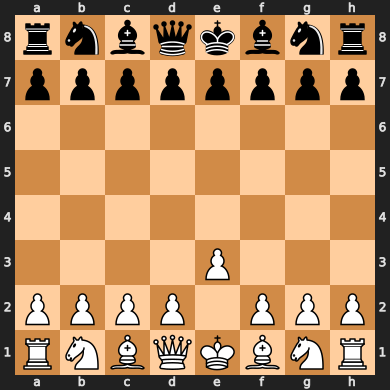

In [44]:
from IPython.display import display, SVG

# Display the board in SVG format
display(SVG(chess.svg.board(board=board)))

# Save the board to an SVG file
with open("chess_board.svg", "w") as f:
    f.write(chess.svg.board(board=board))


In [46]:
import IPython.display as ipd

ipd.Video("/home/vasu/Documents/chessMooveTrack/chessVideo.mp4")

In [14]:
from ultralytics import YOLO
model = YOLO("/home/vasu/Documents/chessMooveTrack/model/yolo8/runs_yolo8/detect/train4/weights/best.pt")
results = model.predict("/home/vasu/Documents/chessMooveTrack/chessVideo.mp4", save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/11087) /home/vasu/Documents/chessMooveTrack/chessVideo.mp4: 256x416 1 black-king, 1 black-rook, 27.1ms
video 1/1 (frame 2/11087) /home/vasu/Documents/chessMooveTrack/chessVideo.mp4: 256x416 1 black-king, 3.3ms
video 1/1 (frame 3/11087) /home/vasu/Documents/chessMooveTrack/chessVideo.mp4: 256x416 1 black-king, 3.2ms
video 1/1 (frame 4/11087) /home/vasu/Documents/chessMooveTrack/chessVideo.mp4: 256x416 1 black-king, 1 black-rook, 3.2ms

In [29]:
from ultralytics import YOLO
model = YOLO("/home/vasu/Documents/chessMooveTrack/model/yolo8/runs_yolo8/detect/train4/weights/best.pt")
results = model.predict("/home/vasu/Documents/chessMooveTrack/chessVideo.mp4", save=True, conf=0.6, iou=0.5)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/11087) /home/vasu/Documents/chessMooveTrack/chessVideo.mp4: 256x416 (no detections), 7.0ms
video 1/1 (frame 2/11087) /home/vasu/Documents/chessMooveTrack/chessVideo.mp4: 256x416 (no detections), 3.2ms
video 1/1 (frame 3/11087) /home/vasu/Documents/chessMooveTrack/chessVideo.mp4: 256x416 (no detections), 3.2ms
video 1/1 (frame 4/11087) /home/vasu/Documents/chessMooveTrack/chessVideo.mp4: 256x416 (no detections), 3.2ms
video 1/1 (frame

In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

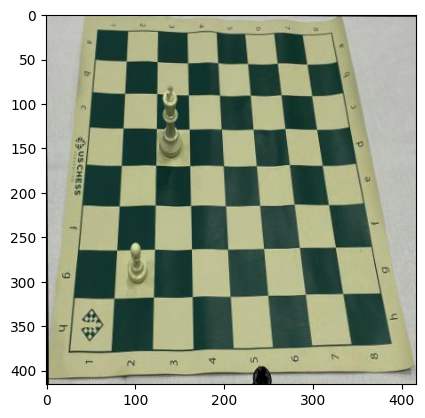

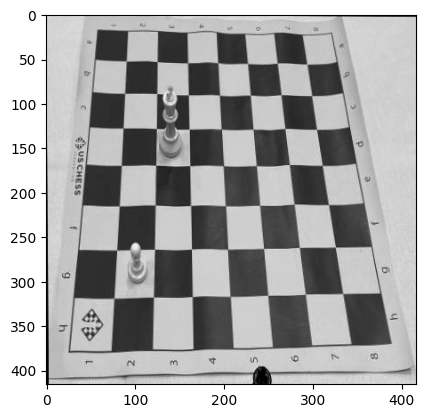

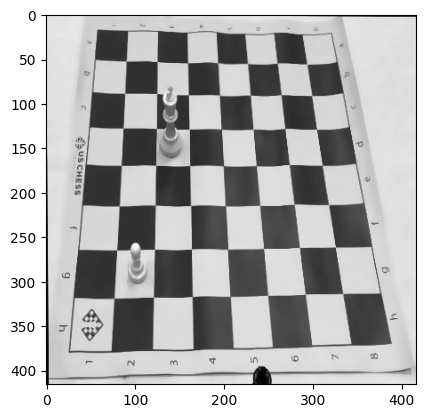

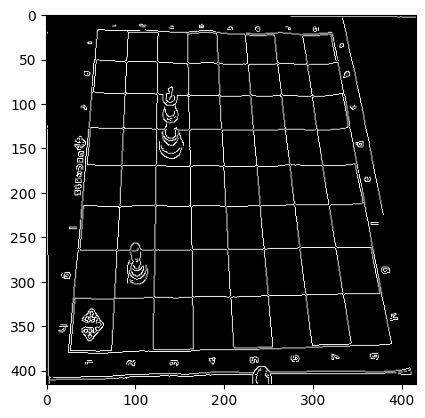

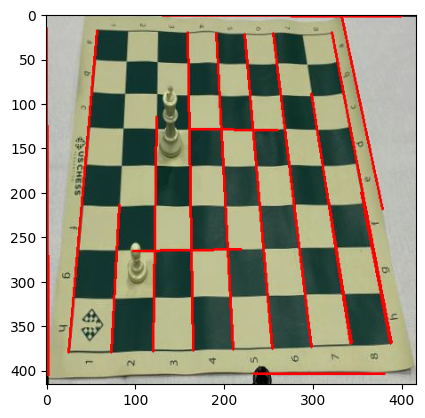

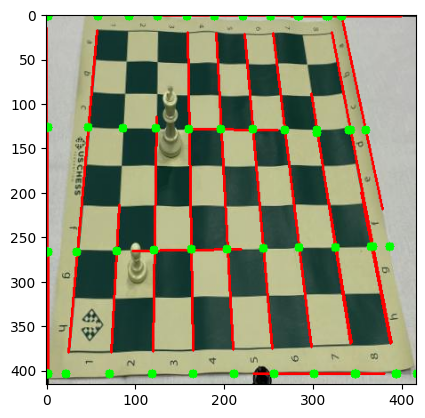

In [42]:
# Read image with OpenCV
img = cv2.imread("/home/vasu/Documents/chessMooveTrack/Test/lessmultichess.jpg")
plt.imshow(img[:,:,::-1])
plt.show()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

# Apply bilateral filter ; denoising
gray = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(gray, cmap='gray')
plt.show()

# Apply Canny edge detection
edged = cv2.Canny(gray, 50, 150)
plt.imshow(edged, cmap='gray')
plt.show()

# Apply Hough line transform
lines = cv2.HoughLinesP(edged, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(img[:, :, ::-1])
plt.show()

# Detect grid intersections
def find_intersections(lines):
    points = []
    for i, line1 in enumerate(lines):
        for line2 in lines[i+1:]:
            x1, y1, x2, y2 = line1[0]
            x3, y3, x4, y4 = line2[0]
            denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
            if denom != 0:
                px = ((x1*y2 - y1*x2) * (x3 - x4) - (x1 - x2) * (x3*y4 - y3*x4)) / denom
                py = ((x1*y2 - y1*x2) * (y3 - y4) - (y1 - y2) * (x3*y4 - y3*x4)) / denom
                points.append((int(px), int(py)))
    return points

intersections = find_intersections(lines)
for point in intersections:
    cv2.circle(img, point, 5, (0, 255, 0), -1)

plt.imshow(img[:, :, ::-1])
plt.show()